In [1]:
%pip install pulp
%pip install pandas
%pip install matplotlib
%pip install numpy

Note: you may need to restart the kernel to use updated packages.
     ---------------------------------------- 16.4/16.4 MB 4.7 MB/s eta 0:00:00


You should consider upgrading via the 'c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
%pip install pandas
%pip install pulp
import pulp
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pandas in c:\users\lenovo\appdata\local\programs\python\python310\lib\site-packages (2.3.0)



You should consider upgrading via the 'c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [3]:
problem = pulp.LpProblem("Product_Mix_Optimization", pulp.LpMaximize)

In [4]:
x_A = pulp.LpVariable("Product_A", lowBound=0, cat='Continuous')
x_B = pulp.LpVariable("Product_B", lowBound=0, cat='Continuous')

In [5]:
problem += 10 * x_A + 15 * x_B, "Total Profit"



In [6]:
problem += 2 * x_A + 3 * x_B <= 100, "Labor_Hours_Constraint"
problem += 4 * x_A + 2 * x_B <= 120, "Raw_Material_X_Constraint"

In [7]:
print("--- LP Problem Formulation ---")
print(problem)
print("----------------------------\n")

--- LP Problem Formulation ---
Product_Mix_Optimization:
MAXIMIZE
10*Product_A + 15*Product_B + 0
SUBJECT TO
Labor_Hours_Constraint: 2 Product_A + 3 Product_B <= 100

Raw_Material_X_Constraint: 4 Product_A + 2 Product_B <= 120

VARIABLES
Product_A Continuous
Product_B Continuous

----------------------------



In [9]:
problem.solve()

1

In [10]:
print(f"Status: {pulp.LpStatus[problem.status]}\n")



Status: Optimal



In [11]:
if problem.status == pulp.LpStatusOptimal:
	print("--- Optimal Solution ---")
	print(f"Optimal units of Product A to produce: {x_A.varValue:.2f}")
	print(f"Optimal units of Product B to produce: {x_B.varValue:.2f}")
	print(f"Maximum Total Profit: ${pulp.value(problem.objective):.2f}\n")
	
else:
    print("No optimal solution found.")

--- Optimal Solution ---
Optimal units of Product A to produce: 0.00
Optimal units of Product B to produce: 33.33
Maximum Total Profit: $500.00



In [12]:
x = np.linspace(0, 70, 400) # Extend the range to clearly see the feasible region



In [13]:
y1 = (100 - 2 * x) / 3

y2 = 60 - 2 * x



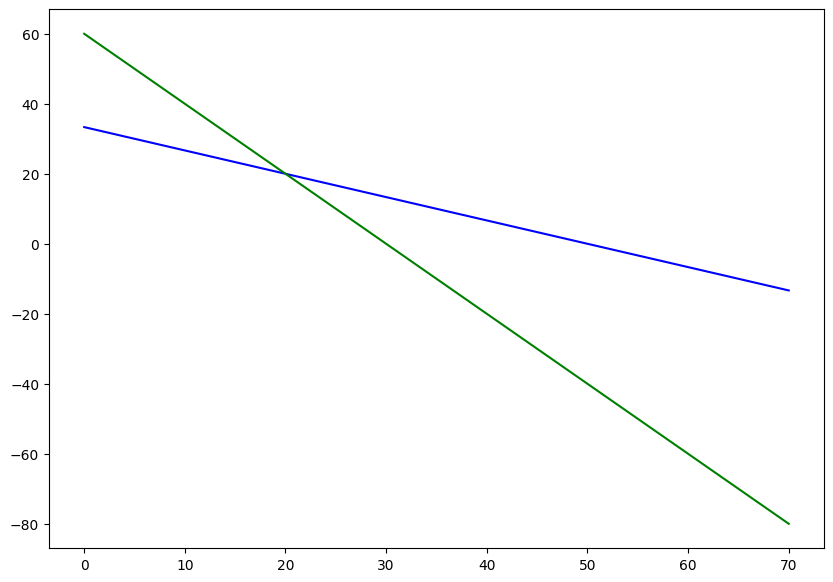

In [14]:
plt.figure(figsize=(10, 7))

plt.plot(x, y1, label=r'$2x_A + 3x_B \le 100$ (Labor Hours)', color='blue')
plt.plot(x, y2, label=r'$4x_A + 2x_B \le 120$ (Raw Material X)', color='green')

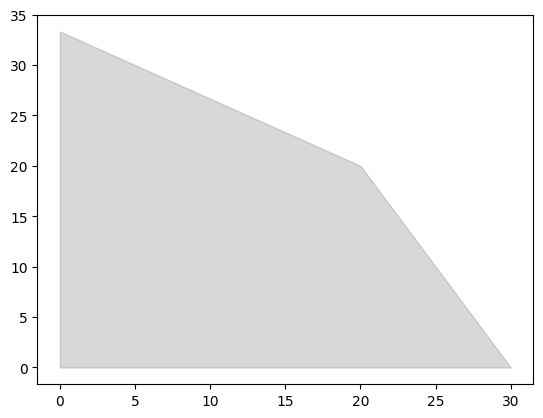

In [15]:
plt.fill_between(x, 0, np.minimum(y1, y2), where=(x >= 0) & (np.minimum(y1, y2) >= 0),
color='gray', alpha=0.3, label='Feasible Region')

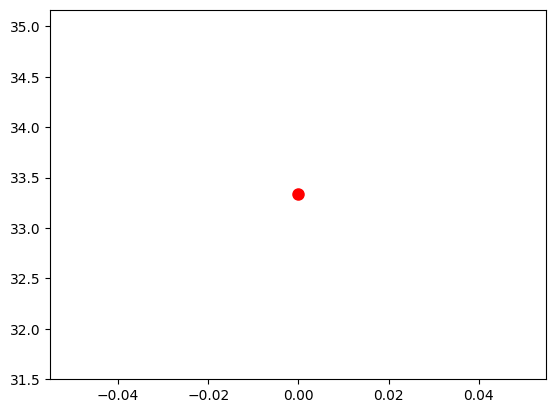

In [16]:
optimal_xA = x_A.varValue
optimal_xB = x_B.varValue
plt.plot(optimal_xA, optimal_xB, 'ro', markersize=8, label=f'Optimal Solution ($x_A={optimal_xA:.2f}, x_B={optimal_xB:.2f}$)')

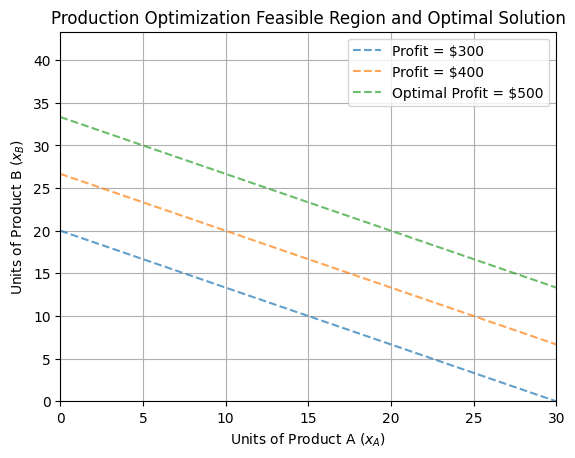

In [17]:
profit_levels = [300, 400, pulp.value(problem.objective)] # Include the optimal profit
for p in profit_levels:
 plt.plot(x, (p - 10 * x) / 15, linestyle='--', alpha=0.7,
label=f'Profit = ${p:.0f}' if p != pulp.value(problem.objective) else f'Optimal Profit = ${p:.0f}')

plt.xlim(0, max(x_A.varValue + 10, 30)) # Adjust x-axis limits dynamically
plt.ylim(0, max(x_B.varValue + 10, 40)) # Adjust y-axis limits dynamically
plt.xlabel('Units of Product A ($x_A$)')
plt.ylabel('Units of Product B ($x_B$)')
plt.title('Production Optimization Feasible Region and Optimal Solution')
plt.grid(True)
plt.axvline(0, color='black',linewidth=0.5)
plt.axhline(0, color='black',linewidth=0.5)
plt.legend()
plt.show()